<a href="https://colab.research.google.com/github/tanvir917/datascience/blob/main/MDA512_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download rashikrahmanpritom/heart-attack-analysis-prediction-dataset

heart-attack-analysis-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip heart-attack-analysis-prediction-dataset

Archive:  heart-attack-analysis-prediction-dataset.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace o2Saturation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df=pd.read_csv("/content/heart.csv")
df1=pd.read_csv("/content/o2Saturation.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
df1.rename(columns={"98.6": "Saturastion"}, inplace=True)

In [ ]:
data = pd.concat([df,df1], axis=1)

In [ ]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturastion
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0,97.5
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0,97.5
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0,97.5
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0,97.5
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0,97.5


In [ ]:
data.shape

(3585, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trtbps       303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalachh     303 non-null    float64
 8   exng         303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slp          303 non-null    float64
 11  caa          303 non-null    float64
 12  thall        303 non-null    float64
 13  output       303 non-null    float64
 14  Saturastion  3585 non-null   float64
dtypes: float64(15)
memory usage: 420.2 KB


In [ ]:
data.isnull().sum()

age            3282
sex            3282
cp             3282
trtbps         3282
chol           3282
fbs            3282
restecg        3282
thalachh       3282
exng           3282
oldpeak        3282
slp            3282
caa            3282
thall          3282
output         3282
Saturastion       0
dtype: int64

In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturastion
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [ ]:
data.isna().sum()

age            3282
sex            3282
cp             3282
trtbps         3282
chol           3282
fbs            3282
restecg        3282
thalachh       3282
exng           3282
oldpeak        3282
slp            3282
caa            3282
thall          3282
output         3282
Saturastion       0
dtype: int64

# Within the missingno library, there are four types of plots for visualising data completeness: the barplot, the matrix plot, the heatmap, and the dendrogram plot. Each has its own advantages for identifying missing data.

we can see there is so many missing rows except Saturasyon, so we will clean the NaN or missing values.


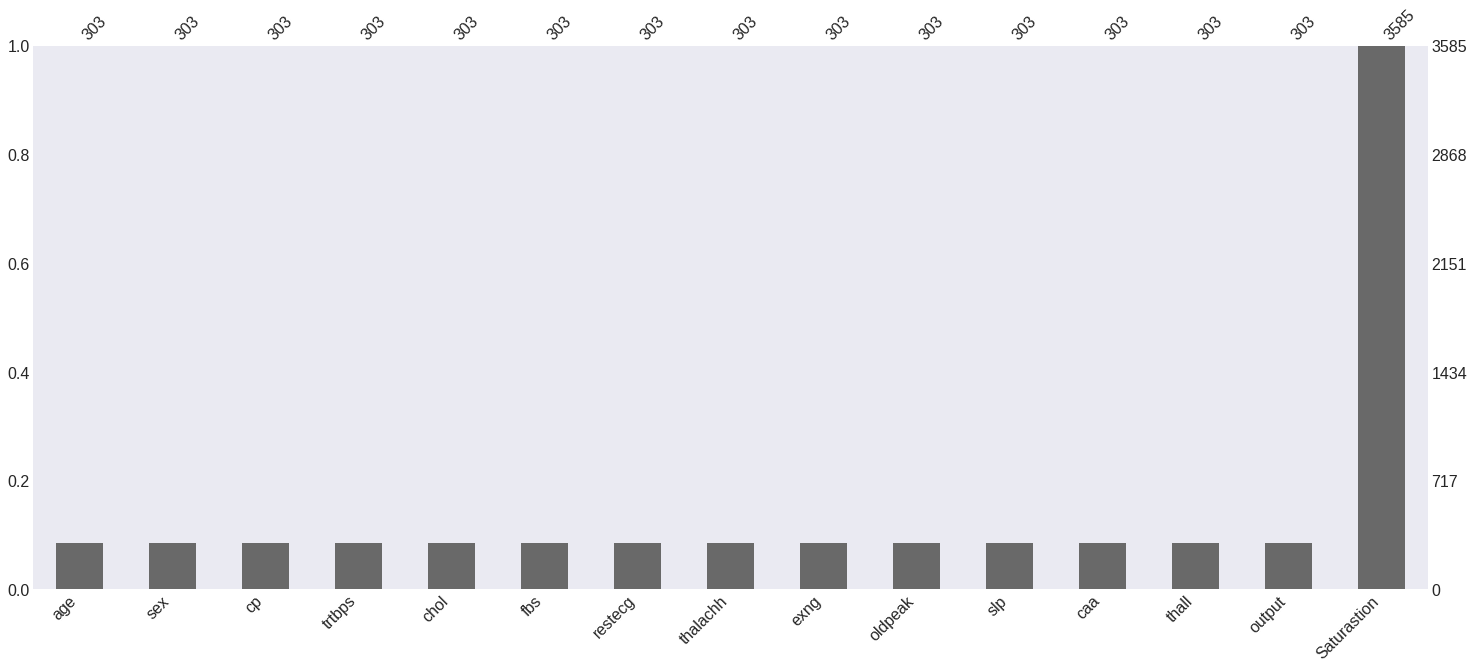

In [ ]:
msno.bar(data)

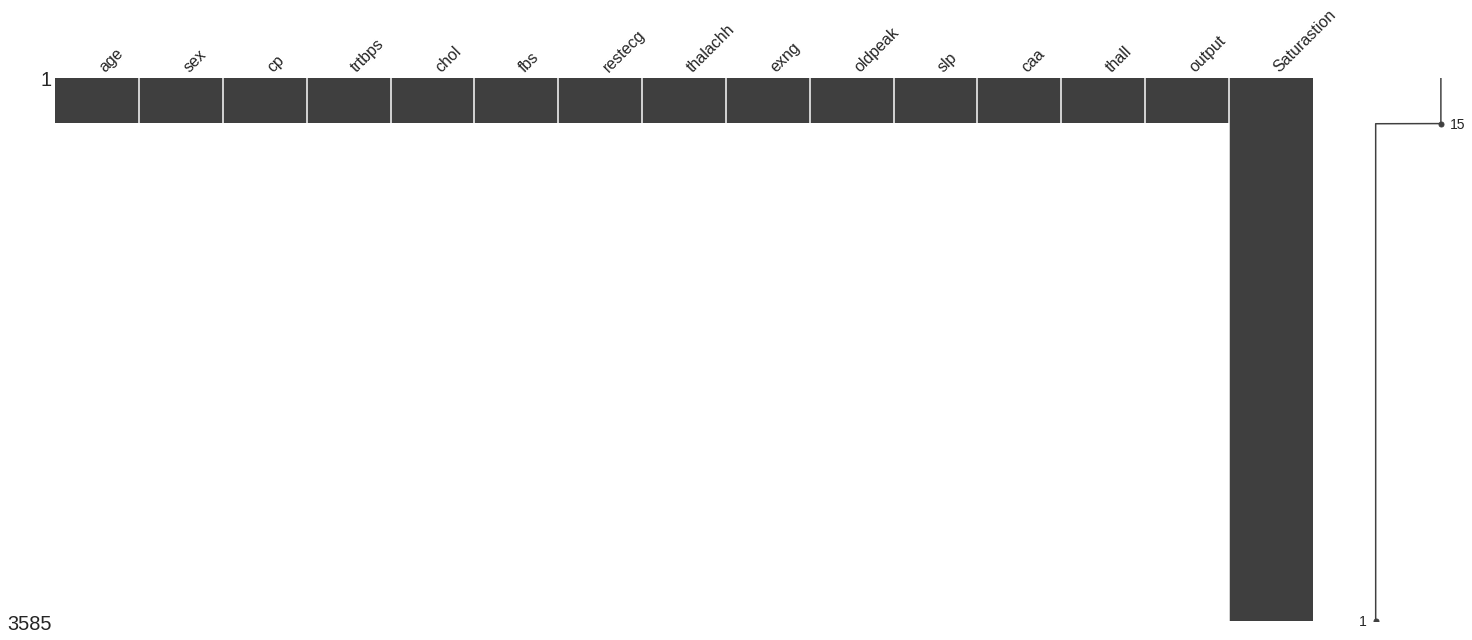

In [ ]:
msno.matrix(data)

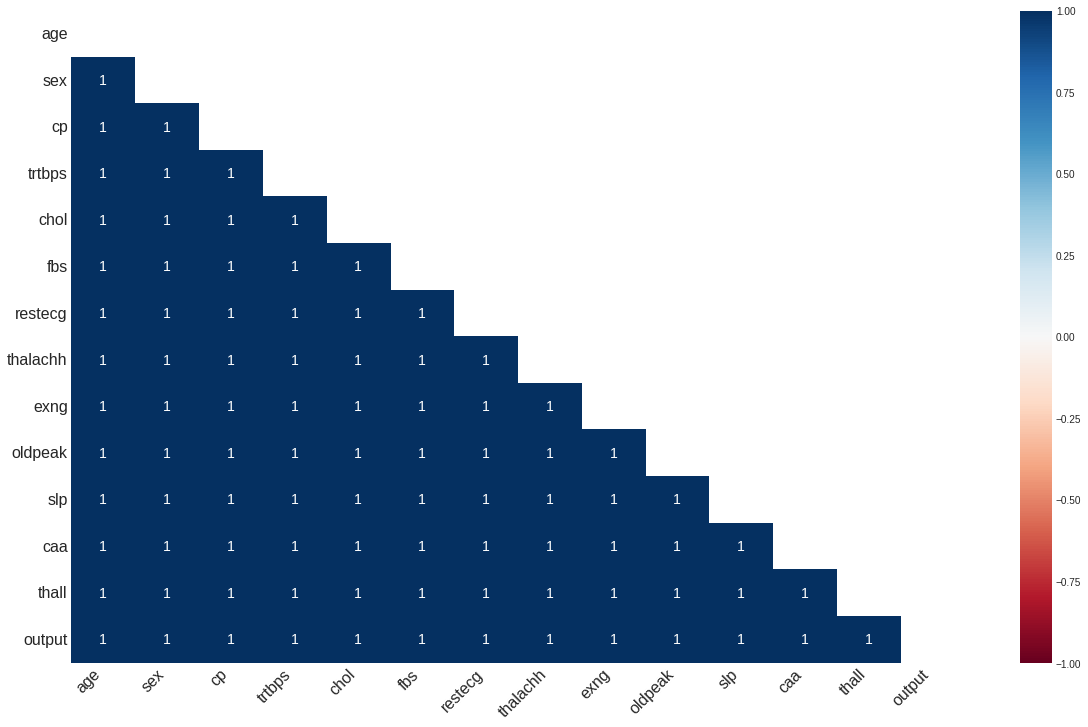

In [ ]:
msno.heatmap(data)

##Data Cleaning

Cleaning the data by dropping duplicates value

In [ ]:
data[data.duplicated()]
data.drop_duplicates(inplace = True)

In [ ]:
cleared_data = data.dropna()

New cleaned dataframe

In [ ]:
cleared_data.shape

(302, 15)

#Data Visualisation 

Different Visualisations of data in the next few cells

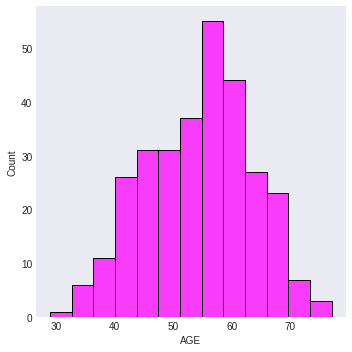

In [ ]:
sns.displot(data=data, x="age", color="magenta")
plt.xlabel("AGE")
plt.show()

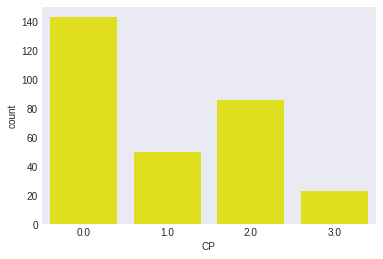

In [ ]:
sns.countplot(data=data, x="cp", color="yellow")
plt.xlabel("CP")
plt.show()

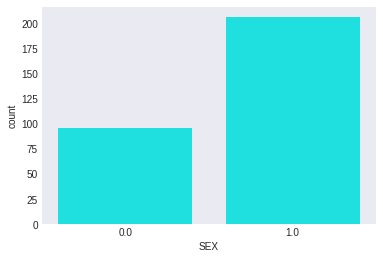

In [ ]:
sns.countplot(data=data, x="sex", color="cyan")
plt.xlabel("SEX")
plt.show()

defining categorical features and numerical features by dividing the dataset

In [ ]:
#defining categorical features and numerical features
cat = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
num = ["age","trtbps","chol","thalachh","oldpeak"]

In [ ]:
cat

['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

A count plot, also known as a bar chart or a histogram, is a visualization tool that is commonly used to represent the frequency of each category of a categorical variable. The x-axis of a count plot typically represents the categories of the variable, and the y-axis represents the count or frequency of each category. The height of each bar in the plot corresponds to the count or frequency of that category.

Count plots are useful for exploring the distribution of a categorical variable, and can be used to identify patterns and trends in the data.

 a count plot can be used to determine which categories of a variable are the most common, or to identify any outliers or anomalies in the data.

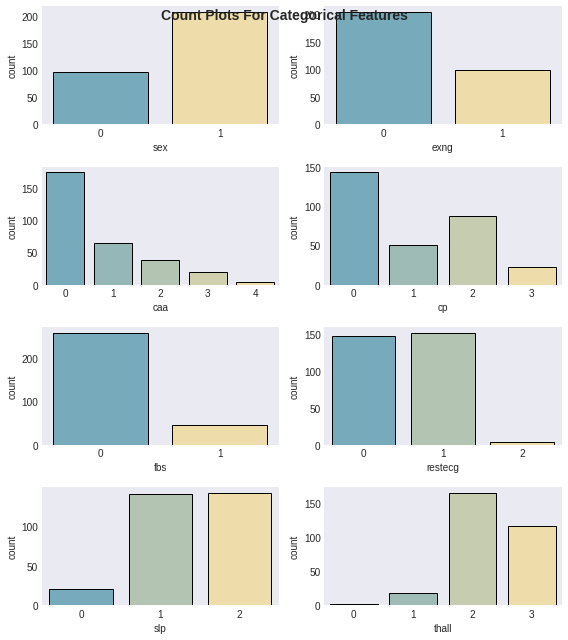

In [ ]:
_, axes = plt.subplots(4, 2, figsize = (8,9))
axes = np.array(axes)
i = 0
for ax in axes.reshape(-1) :
    cat_name = cat[i]
    sns.countplot(x = df[cat_name], ax = ax, alpha = 1, palette = 'blend:#7AB,#EDA', saturation =1, edgecolor='k', linewidth=1)
    i = i + 1
_.suptitle('Count Plots For Categorical Features',fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

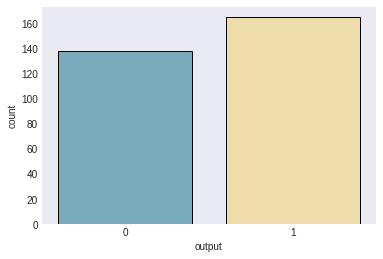

In [ ]:
sns.countplot(x = df['output'],alpha = 1, palette = "blend:#7AB,#EDA", saturation =1, edgecolor='k', linewidth=1)


Histograms are useful for exploring the distribution of a numerical variable. They can be used to identify patterns and trends in the data, such as the shape of the distribution (e.g. normal, skewed, etc.), or to identify any outliers or anomalies in the data.


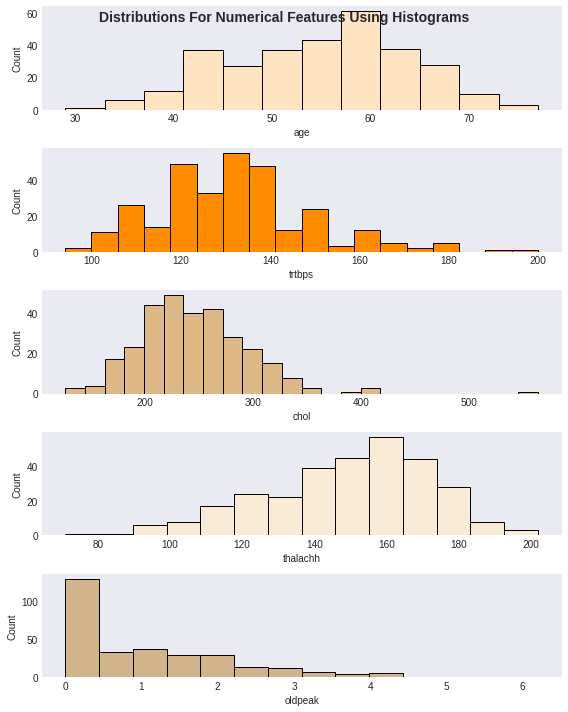

In [ ]:
_, axes = plt.subplots(5, 1, figsize = (8,10))
axes = np.array(axes)
colors = ['bisque','darkorange','burlywood','antiquewhite','tan']
for i in range(len(axes.reshape(-1,1))):
    sns.histplot(df[num[i]], alpha = 1, color = colors[i],edgecolor='k', linewidth=1,  ax = axes[i])

_.suptitle('Distributions For Numerical Features Using Histograms' , fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

Box plots are useful for exploring the distribution of a continuous variable, and can be used to identify patterns and trends in the data.

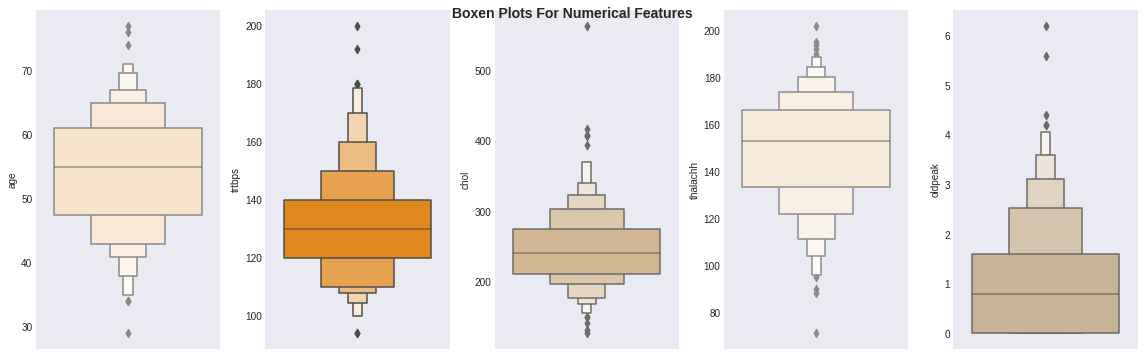

In [ ]:
_, axes = plt.subplots(1, 5, figsize = (16,5))

axes = np.array(axes)
colors = ['bisque','darkorange','burlywood','antiquewhite','tan']
for i in range(len(axes.reshape(-1,1))):
    sns.boxenplot(y = df[num[i]], color = colors[i], ax = axes[i] )


_.suptitle('Boxen Plots For Numerical Features', fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

 heatmaps can be used to display the distribution of numerical features in a dataset, it is useful to understand the range of the values, and the variations of the values, as well as the outliers, if any.

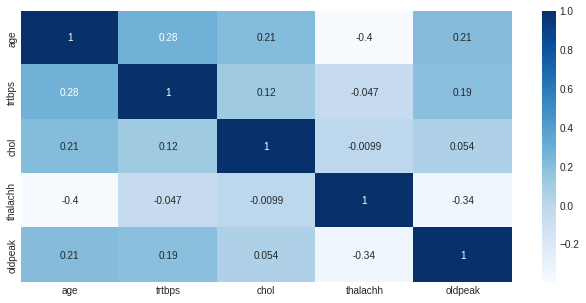

In [ ]:
#heatmap for numerical features
plt.figure(figsize = (11,5))
sns.heatmap(df[num].corr(), annot = True, cmap = 'Blues')
plt.show()

frequency of occurence of a categorical variable

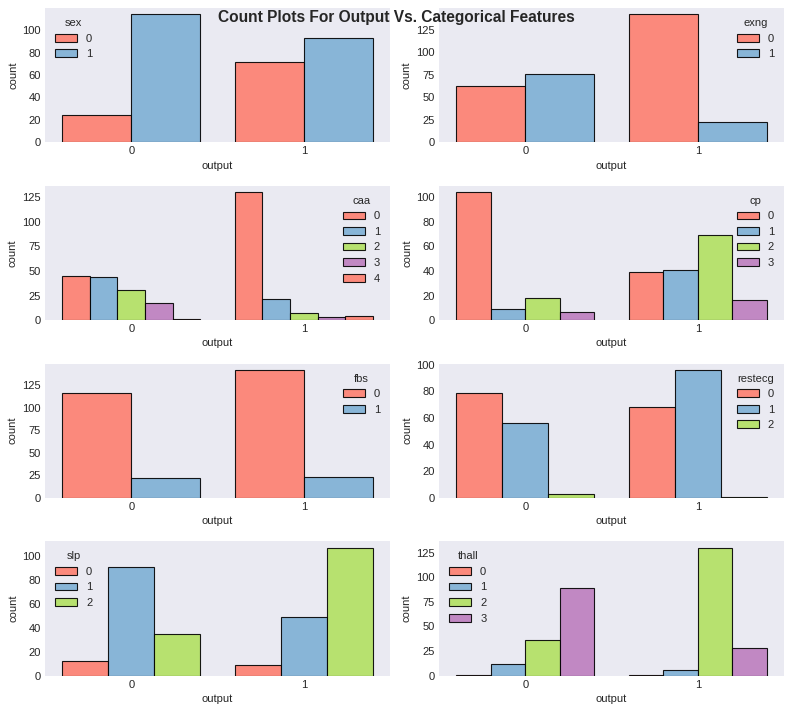

In [ ]:
_, axes = plt.subplots(4, 2, figsize = (10,9), dpi = 80)
axes = np.array(axes)
i = 0
for ax in axes.reshape(-1) :
    cat_name = cat[i]
    sns.countplot(x = df['output'] ,hue = df[cat_name] , ax = ax, alpha = 0.9, palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"], saturation =1, edgecolor='k', linewidth=1)
    i = i + 1
_.suptitle('Count Plots For Output Vs. Categorical Features',fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

Kernel density estimation (KDE) -> used to represent the distribution of a continuous variable

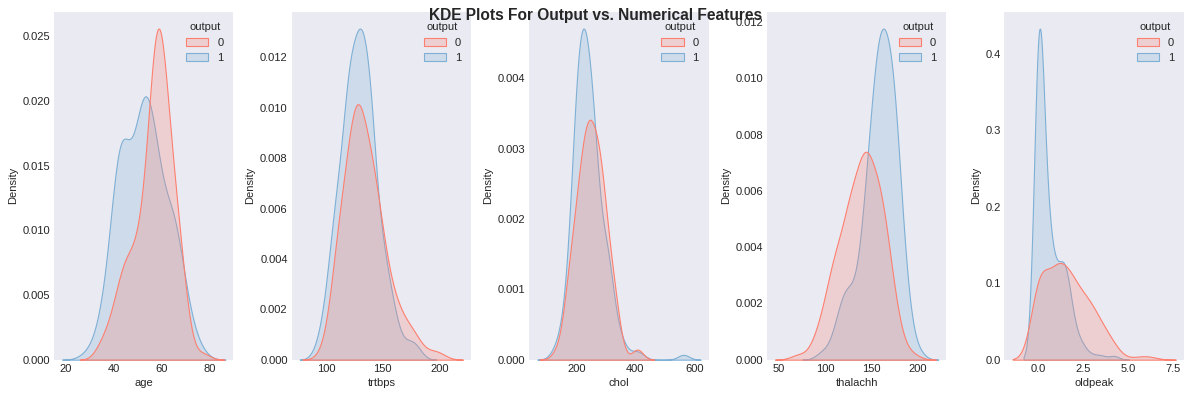

In [ ]:
_, axes = plt.subplots(1, 5, figsize = (15,5), dpi = 80)
axes = np.array(axes)
i = 0
for ax in axes.reshape(-1) :
    num1 = num[i]
    sns.kdeplot(data = df ,x=  df[num1], hue = 'output', fill = True, ax = ax, palette = ["#fd7f6f", "#7eb0d5"])
    i = i + 1
_.suptitle('KDE Plots For Output vs. Numerical Features',fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

In [ ]:
["#ffb400", "#d2980d", "#a57c1b", "#786028", "#363445", "#48446e", "#5e569b", "#776bcd", "#9080ff"]

['#ffb400',
 '#d2980d',
 '#a57c1b',
 '#786028',
 '#363445',
 '#48446e',
 '#5e569b',
 '#776bcd',
 '#9080ff']

box plot -> summary statistics of a continuous variable

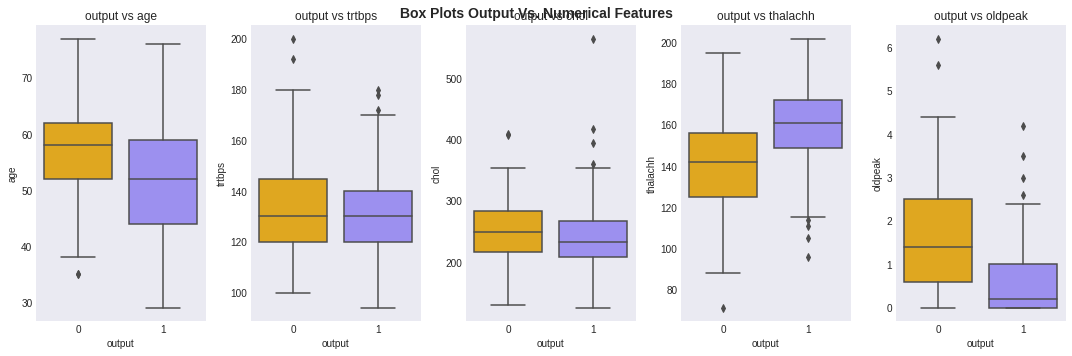

In [ ]:
f, ax = plt.subplots(1,5 , figsize = (15,5))

for i in range(len(num)):
    sns.boxplot(x = 'output',y = num[i],  data =df, ax = ax[i] , palette = ['#ffb400','#9080ff'])
    ax[i].title.set_text('output vs {0}'.format(num[i]))
f.suptitle('Box Plots Output Vs. Numerical Features', fontsize = 14, fontweight = 'heavy')
           
plt.tight_layout()

In [ ]:
df_pair = df.drop(cat, axis = 1)

Scatter matrix -> used to display the relationship between multiple continuous variables in a dataset

Text(0.5, 1, 'Scatter Matrix For Output Vs. Numerical Features')

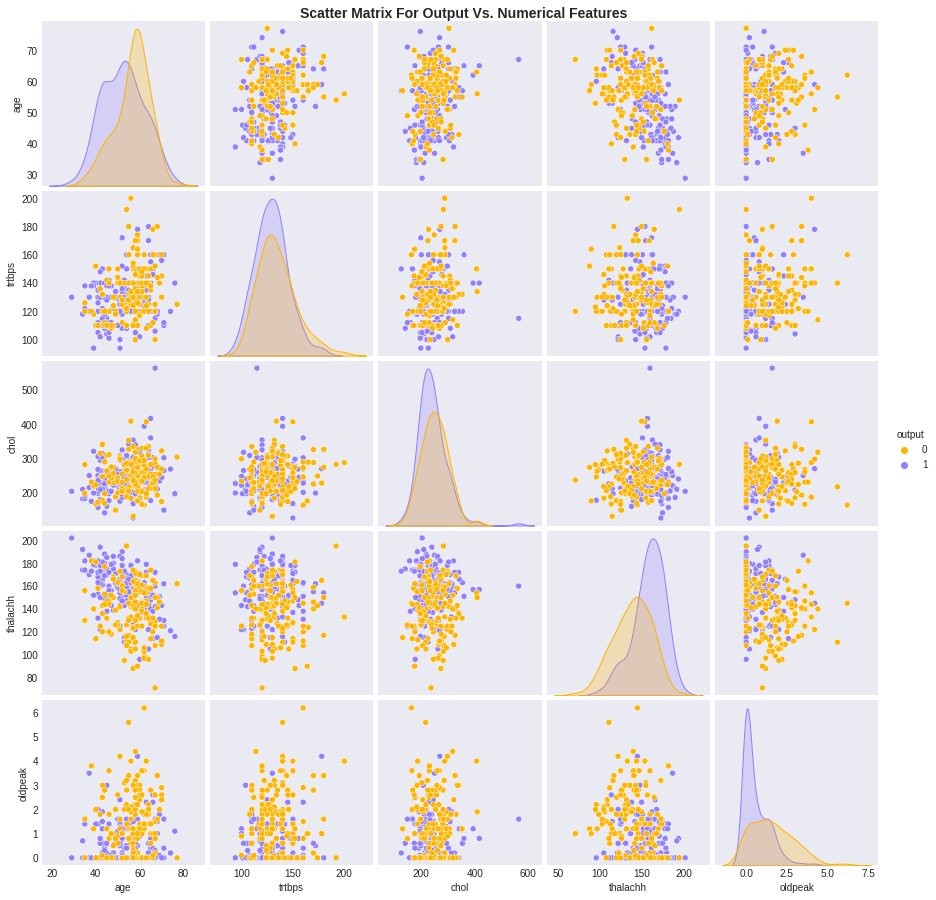

In [ ]:
#plt.figure(figsize=(5,5))
['#ffb400','#9080ff']
f = sns.pairplot(df_pair, hue = 'output',diag_kind="kde",  palette = ['#ffb400','#9080ff'])
f.fig.suptitle('Scatter Matrix For Output Vs. Numerical Features',fontsize = 14, fontweight = 'heavy',  y = 1 )

#Data Preprocessing 

RobustScaler is a pre-processing method used in machine learning and statistics to scale numerical variables.


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC

####Data Transformation

get_dummies, 
function is used to convert categorical variables into numerical variables,
this command will create dummy variables for the columns specified in the "cat" variable, in the dataframe "cleared_data", and drop the first level of each categorical variable.

This command is useful when preparing data for a machine learning model, particularly for models that can't handle categorical variables directly. It's also useful when selecting the relevant variables for the analysis, and reducing the dimensionality of the dataset.



In [ ]:
df_1 = pd.get_dummies(cleared_data, columns = cat, drop_first = True)
X = df_1.drop('output', axis = 1)
y = df_1['output']

####Removing outliers

outliers: There are several ways to remove outliers from a dataset:

1. Z-score method: This method calculates the Z-score for each data point and removes any data point that falls outside of a certain range, usually 3 standard deviations from the mean.
2. Interquartile range (IQR) method: This method calculates the first and third quartiles (Q1 and Q3) of the data and removes any data point that falls outside of the range of (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR), where IQR is the interquartile range (Q3 - Q1).
3. Percentile-based method: This method removes any data point that falls outside of a certain range of percentiles, usually between the 5th and 95th percentiles.
4. Clustering method: This method uses clustering algorithms to identify and remove outliers based on the density of the data points.
5. Visual inspection: This method involves visually inspecting the data using plots such as box plots, scatter plots or histograms to identify and remove outliers.
It's important to note that removing outliers is not always the best solution, it depends on the nature of the data and the purpose of the analysis. In some cases, outliers might be important data points that should not be removed. It's essential to check the impact of removing outliers on the results of the analysis, and if necessary, to keep some of the outliers in the dataset.

we used interquantile range method, RobustScaler, can be useful when the data contains outliers, that can affect the scaling of the data, and the performance of the model. Also, it's useful when the data is not normally distributed

 The "fit_transform" method is used to fit the scaler to the data and then apply the scaling transformation to the data.

In [ ]:
scaler = RobustScaler()
X[num] = scaler.fit_transform(X[num])

Output of data after transformation

In [ ]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,Saturastion,sex_1.0,exng_1.0,caa_1.0,caa_2.0,...,cp_2.0,cp_3.0,fbs_1.0,restecg_1.0,restecg_2.0,slp_1.0,slp_2.0,thall_1.0,thall_2.0,thall_3.0
0,0.576923,0.75,-0.117647,-0.076336,0.9375,98.6,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.423077,0.00,0.149020,1.053435,1.6875,98.6,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.115385,0.00,-0.572549,0.595420,0.3750,98.6,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.038462,-0.50,-0.070588,0.778626,0.0000,98.1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.115385,-0.50,1.780392,0.320611,-0.1250,97.5,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: output, dtype: float64

split a dataset into training and testing sets and select 30% of data for training the model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)
print('Shape of x_train: ',x_train.shape)
print('Shape of x_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X:  (302, 23)
Shape of y:  (302,)
Shape of x_train:  (211, 23)
Shape of x_test:  (91, 23)
Shape of y_train:  (211,)
Shape of y_test:  (91,)


Training the Logistic regression model and get prediction

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8681318681318682

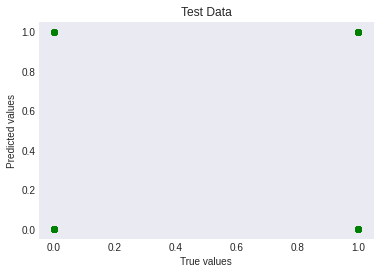

In [ ]:
# plot the predicted values of y against the test data
plt.scatter(y_test, y_pred, color='g') 

plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Test Data")
plt.show()

###Evaluation metric

A classification report is a type of evaluation metric used in machine learning to evaluate the performance of a classification model. It is used to summarize the precision, recall, f1-score and support of a model for each class.

The precision of a model refers to the proportion of true positive predictions out of all positive predictions. The recall of a model refers to the proportion of true positive predictions out of all actual positive observations. The F1-score is the harmonic mean of precision and recall.

The classification report is generated using the classification_report function from the library scikit-learn (sklearn). The function takes as input the true labels of the data (y_true) and the predicted labels of the data (y_pred) and returns a report containing the precision, recall, f1-score, and support for each class.

A classification report is a useful tool to evaluate the performance of a classification model, and can be used to compare the performance of different models. It is particularly useful when there is an imbalance in the distribution of classes in the data, as it allows you to evaluate the performance of the model on each class separately.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86        42
         1.0       0.89      0.86      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



training the Support Vector Classifier and get prediction

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)





0.5384615384615384

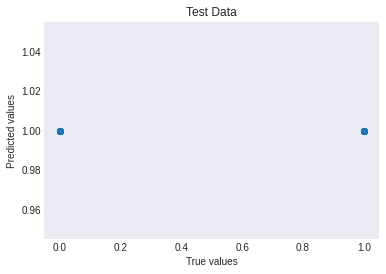

In [ ]:
# plot the predicted values of y against the test data
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Test Data")
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        42
         1.0       0.54      1.00      0.70        49

    accuracy                           0.54        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.29      0.54      0.38        91



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training the Decision tree classifier model

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
x_pred = dtc.predict(x_train)
acc_log_test =round(accuracy_score(y_test, y_pred)*100,2)
print("Testing Accuracy: % {}".format(acc_log_test))





Testing Accuracy: % 80.22


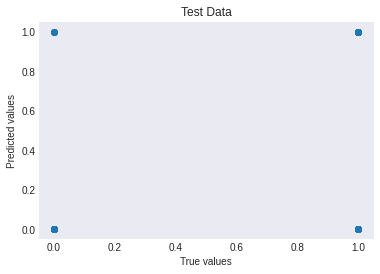

In [ ]:
# plot the predicted values of y against the test data
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Test Data")
plt.show()


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        42
         1.0       0.92      0.69      0.79        49

    accuracy                           0.80        91
   macro avg       0.82      0.81      0.80        91
weighted avg       0.83      0.80      0.80        91



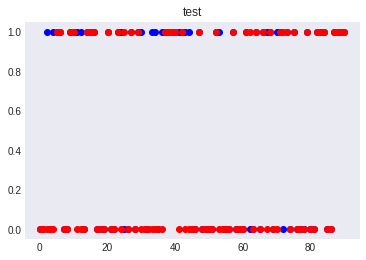

In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return



plotGraph(y_test, y_pred, "test")

##Result

After evaluating 3 models we can say, Logistic regression gives relatively better results which is about 86% if we divide the dataset into train-30:test-70.